In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import loader
import plot
import helpers
import importlib
import joblib
importlib.reload(loader)
importlib.reload(plot)
importlib.reload(helpers)
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import ShuffleSplit, cross_val_score, train_test_split, StratifiedKFold, learning_curve
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.optimizers import RMSprop
from sklearn.ensemble import AdaBoostClassifier
from tensorflow.keras.optimizers import SGD

In [ ]:
data = loader.load_adult_data()
features = [col for col in data.columns if col != "target"]
X = data[features]
y = data["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

In [ ]:
# Normalize input data
scaler = MinMaxScaler()
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.fit_transform(X_test)

In [ ]:
def build_classifier(learn_rate=0.001, momentum=0, hidden_layer_size=10):
    classifier = Sequential()
    classifier.add(Dense(units = len(features), activation = 'relu', input_dim=len(features)))

    classifier.add(Dense(units = hidden_layer_size, activation = 'relu'))

    classifier.add(Dense(1, activation = 'sigmoid'))
    optimizer = SGD(lr=learn_rate, momentum=momentum)
    classifier.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return classifier

In [ ]:
model = KerasClassifier(build_fn=build_classifier, verbose=0)
# batch_size = [10, 20, 40, 60, 80, 100]
epochs = [50, 100, 200]
learn_rate = [0.01, 0.1, 0.2, 0.3]
momentum = [0.0, 0.2, 0.4]
param_grid = dict(learn_rate=learn_rate, momentum=momentum, epochs=epochs)
grid = GridSearchCV(estimator=model, param_grid=param_grid, return_train_score=True)
grid_result = grid.fit(X_train_norm, y_train.to_numpy())
res = grid_result.cv_results_
res_df = helpers.scikit_cv_result_to_df(res)
res_df.sort_values(by='rank_test_score')

In [ ]:
model.get_params()

In [ ]:
grid_res_df_input_ft_len = joblib.load("saved_ann_results/adult_ann_grid_cv_res_input_feature_len_df.pkl")

In [ ]:
grid_res_df_input_ft_len.head()

mean_fit_time  std_fit_time  mean_score_time  \
epochs learn_rate momentum                                                 
50     0.01       0.0           20.754322      0.049444         0.202194   
                  0.2           25.291756      8.013708         0.229938   
                  0.4           33.430152      9.640226         0.228268   
       0.10       0.0           20.803863      0.016022         0.227868   
                  0.2           29.389851      9.735829         0.225526   

                            std_score_time  mean_test_score  std_test_score  \
epochs learn_rate momentum                                                    
50     0.01       0.0             0.024040         0.849377        0.006057   
                  0.2             0.024854         0.848851        0.006015   
                  0.4             0.022614         0.848894        0.006104   
       0.10       0.0             0.028942         0.844463        0.007333   
                  0.2             0.029899         0.842401        0.008988   

                            rank_test_score  mean_train_score  std_train_score  
epochs learn_rate momentum                                                      
50     0.01       0.0                     1          0.855750         0.001266  
                  0.2                     3          0.856529         0.002369  
                  0.4                     2          0.861190         0.002457  
       0.10       0.0                     7          0.878927         0.003680  
                  0.2                    12          0.881099         0.003468

In [ ]:
grid_res_df_input_ft_len.sort_values(by='rank_test_score').head()

mean_fit_time  std_fit_time  mean_score_time  \
epochs learn_rate momentum                                                 
50     0.01       0.0           20.754322      0.049444         0.202194   
                  0.4           33.430152      9.640226         0.228268   
                  0.2           25.291756      8.013708         0.229938   
100    0.01       0.4           51.309329     15.471216         0.241476   
200    0.01       0.2          120.727138     26.385533         0.257746   

                            std_score_time  mean_test_score  std_test_score  \
epochs learn_rate momentum                                                    
50     0.01       0.0             0.024040         0.849377        0.006057   
                  0.4             0.022614         0.848894        0.006104   
                  0.2             0.024854         0.848851        0.006015   
100    0.01       0.4             0.028242         0.846656        0.009769   
200    0.01       0.2             0.005232         0.846437        0.005738   

                            rank_test_score  mean_train_score  std_train_score  
epochs learn_rate momentum                                                      
50     0.01       0.0                     1          0.855750         0.001266  
                  0.4                     2          0.861190         0.002457  
                  0.2                     3          0.856529         0.002369  
100    0.01       0.4                     4          0.873157         0.003278  
200    0.01       0.2                     5          0.883259         0.002617

In [ ]:
learn_rate = [0.01, 0.1, 0.2, 0.3]
momentum = [0.0, 0.2]
plt_data = []
labels = []
for lr in learn_rate:
    for m in momentum:
        tmp = grid_res_df_input_ft_len.xs((lr, m), level=['learn_rate', 'momentum'])
        plt_data.append(tmp)
        labels.append(f"L={lr}, M={m}")

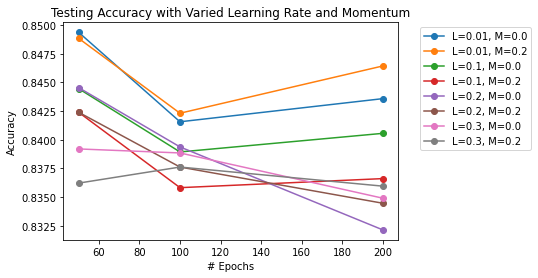

In [ ]:
for i in range(len(plt_data)):
    plt.plot(epochs, plt_data[i]['mean_test_score'], marker='o', label=labels[i])
plt.legend(loc="best", bbox_to_anchor=(1.05, 1))
plt.title('Testing Accuracy with Varied Learning Rate and Momentum')
plt.ylabel('Accuracy')
plt.xlabel('# Epochs')
plt.show()

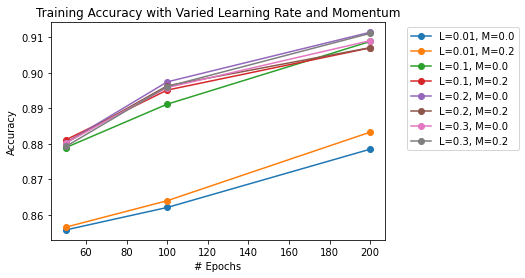

In [ ]:
for i in range(len(plt_data)):
    plt.plot(epochs, plt_data[i]['mean_train_score'], marker='o', label=labels[i])
plt.legend(loc="best", bbox_to_anchor=(1.05, 1))
plt.title('Training Accuracy with Varied Learning Rate and Momentum')
plt.ylabel('Accuracy')
plt.xlabel('# Epochs')
plt.show()

In [40]:
history_input_len_ft = joblib.load("saved_ann_results/adult_ann_input_len_features_history_LR_.01_M_0.pkl")

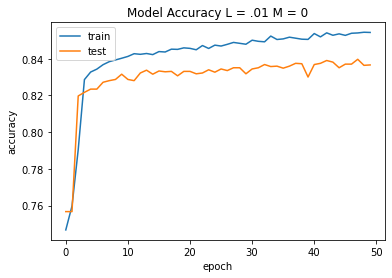

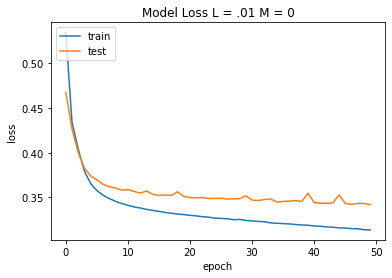

In [41]:
plt.plot(history_input_len_ft['accuracy'])
plt.plot(history_input_len_ft['val_accuracy'])
plt.title('Model Accuracy L = .01 M = 0')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history_input_len_ft['loss'])
plt.plot(history_input_len_ft['val_loss'])
plt.title('Model Loss L = .01 M = 0')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
def build_best_classifier(learn_rate=0.01, momentum=0):
    # Initialising the ANN
    classifier = Sequential()
    # Adding the input layer and the first hidden layer
    classifier.add(Dense(units = len(features), activation = 'relu', input_dim=len(features)))

    classifier.add(Dense(units = 10, activation = 'relu'))

    classifier.add(Dense(1, activation = 'sigmoid'))
    optimizer = SGD(learning_rate=learn_rate, momentum=momentum)
    classifier.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return classifier

In [ ]:
best_model = KerasClassifier(build_fn=build_best_classifier)
# Fit the model
history = best_model.fit(X_train_norm, y_train, validation_split=0.2, epochs=50, verbose=0)
best_model.score(X_test_norm, y_test)

306/306 [==============================] - 1s 2ms/step - loss: 0.3268 - accuracy: 0.8468


0.8467601537704468